In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os
from pathlib import Path
import seaborn as sns
from tqdm import tqdm


In [5]:
path = os.getcwd() + "/Notebook"
files = os.listdir(path) 
months = [i for i in files if str(i).isnumeric()]


In [3]:
for i in tqdm(months):
    dataframes=[]
    thisdir = os.getcwd() + "/Notebook" +"/" +str(i)
    for j in os.listdir(thisdir):
        if j.isnumeric():
            dir2 = os.listdir(thisdir+"/"+str(j))
            for k in dir2:
                if 'Reis_Bestemming_Datum' in k: 
                    file_dir = thisdir + "/" + j + "/" + k
                    df = pd.read_csv(str(file_dir),sep=';')
                    #Clean stuff
                    df = df[df.AankomstHalteNaam != 'Overig']
                    df = df[df.AankomstHalteNaam != '[[ Onbekend ]]']
                    
                    df = df.dropna()

                    df = df.sort_values(by=['Datum'])
                    dataframes.append(df)
                    
    merged = pd.concat(dataframes, ignore_index=True)
    merged.to_csv('merged' + str(i) + ".csv")
        
    

100%|██████████| 12/12 [00:04<00:00,  2.52it/s]


In [4]:
#all to one file
filelist=[]
for i in tqdm(months):
    dataframes=[]
    thisdir = os.getcwd() + "/Notebook" +"/" +str(i)
    for j in os.listdir(thisdir):
        if j.isnumeric():
            dir2 = os.listdir(thisdir+"/"+str(j))
            for k in dir2:
                if 'Reis_Bestemming_Datum' in k: 
                    file_dir = thisdir + "/" + j + "/" + k
                    df = pd.read_csv(str(file_dir),sep=';')
                        #Clean stuff
                    df = df[df.AankomstHalteNaam != 'Overig']
                    df = df[df.AankomstHalteNaam != '[[ Onbekend ]]']
                    
                    df = df.dropna()

                    dataframes.append(df)
    
    merged = pd.concat(dataframes, ignore_index=True)
    filelist.append(merged)
    
    
final_merged = pd.concat(filelist, ignore_index=True)

100%|██████████| 12/12 [00:01<00:00, 10.76it/s]


In [5]:
final_merged['Modaliteit'] = final_merged.AankomstHalteCode.str.isnumeric()
final_merged.Modaliteit = final_merged.Modaliteit.replace(to_replace=[True],value='Tram of bus')
final_merged.Modaliteit = final_merged.Modaliteit.replace(to_replace=[False],value='Metro')
final_merged.to_csv("Bestemming_Datum_merged.csv")

In [6]:
final_merged.Modaliteit.value_counts()

Tram of bus    656398
Metro           29630
Name: Modaliteit, dtype: int64

In [256]:
ModaliteitTypes = pd.DataFrame(final_merged.groupby('AankomstHalteNaam')['Modaliteit'].apply(list).apply(set)).reset_index()
ModaliteitTypes

NameError: name 'final_merged' is not defined

In [9]:
#Give all trams and station of the same location the same coordinates

droppedduplicates = final_merged.drop_duplicates(subset=['AankomstHalteNaam']).dropna(axis=1)
Final_merged_one_location = pd.merge(final_merged,droppedduplicates, on="AankomstHalteNaam",how='outer')[["Datum_x", "AankomstHalteCode_x", "AankomstLat_y","AankomstHalteNaam" ,"AankomstLon_y", "AantalReizen_x", "Modaliteit_x"]]

In [10]:
Final_merged_one_location.to_csv("Bestemming_Datum_merged_one_location.csv")

In [43]:
#Raw Uur to one file 
raw_filelist=[]
for i in tqdm(months):
    dataframes=[]
    thisdir = os.getcwd() + "/Notebook" +"/" +str(i)
    for j in os.listdir(thisdir):
        if j.isnumeric():
            dir2 = os.listdir(thisdir+"/"+str(j))
            for k in dir2:
                if 'Reis_Bestemming_Uur' in k: 
                    file_dir = thisdir + "/" + j + "/" + k
                    df = pd.read_csv(str(file_dir),sep=None,engine='python')
                        #Clean stuff
#                     if "AankomstHalteNaam" in df.columns:
#                         df = df[df.AankomstHalteNaam != 'Overig']
#                         df = df[df.AankomstHalteNaam != '[[ Onbekend ]]']
                    
#                     df = df.dropna()

                    dataframes.append(df)
    
    merged = pd.concat(dataframes, ignore_index=True)
    raw_filelist.append(merged)
final_merged_Uur_raw_ = pd.concat(raw_filelist, ignore_index=True)


final_merged_Uur_raw_.Datum = final_merged_Uur_raw_.sort_values(by=['Datum'])

100%|██████████| 12/12 [01:04<00:00,  5.35s/it]


In [53]:
final_merged_Uur_raw = final_merged_Uur_raw_.copy()

In [54]:
#Feature engineering
final_merged_Uur_raw['Modaliteit'] = final_merged_Uur_raw.AankomstHalteCode.str.isnumeric()
final_merged_Uur_raw.Modaliteit = final_merged_Uur_raw.Modaliteit.replace(to_replace=[True],value='Tram of bus')
final_merged_Uur_raw.Modaliteit = final_merged_Uur_raw.Modaliteit.replace(to_replace=[False],value='Metro')

In [55]:
#Impute Nans and other uknown values as "missing"

final_merged_Uur_raw = final_merged_Uur_raw.drop("Unnamed: 0",axis=1)
final_merged_Uur_raw = final_merged_Uur_raw.fillna('Missing')
final_merged_Uur_raw.AankomstHalteNaam = final_merged_Uur_raw.AankomstHalteNaam.replace(to_replace=['Overig'],value= 'Missing')
final_merged_Uur_raw.AankomstHalteNaam = final_merged_Uur_raw.AankomstHalteNaam.replace(to_replace=['[[ Onbekend ]]'],value= 'Missing')
final_merged_Uur_raw.AankomstHalteCode = final_merged_Uur_raw.AankomstHalteCode.replace(to_replace=['[[ Onb'],value= 'Missing')
final_merged_Uur_raw.AankomstHalteNaam = final_merged_Uur_raw.AankomstHalteNaam.replace(to_replace=[''],value= 'Missing')

In [15]:


percentage_missing = dict(final_merged_Uur_raw[final_merged_Uur_raw == 'Missing'].count())
percentage_missing = pd.DataFrame.from_dict(percentage_missing, orient='index')
percentage_missing

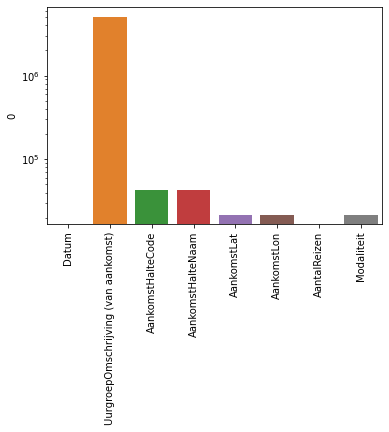

In [27]:
splot=sns.barplot(data=percentage_missing, y=0, x=percentage_missing.index)

splot.set_xticklabels(labels =percentage_missing.index, rotation=90)
splot.set_yscale("log")

In [21]:

temp = final_merged_Uur_raw.groupby(['AankomstHalteNaam','UurgroepOmschrijving (van aankomst)']).count()

missing_dict= {}
for i in dict(temp["Datum"]).items():
    if i[0][1] == "Missing":
        missing_dict[i[0][0]] = i[1]
        
missings = pd.DataFrame.from_dict(missing_dict, orient='index')
total = pd.DataFrame(temp["Datum"]).reset_index().groupby("AankomstHalteNaam").sum()
missings['total'] = total
missings['percentage_missing'] = missings[0]/missings.total*100

plt.figure(figsize=(8, 100))

missings.sort_values('percentage_missing',ascending=False).percentage_missing.plot.barh()




In [ ]:
#data engineer missing values per week

df = final_merged_Uur_raw

df['formatted_date'] = pd.to_datetime(df['Datum'])
df['day_of_year'] = df.formatted_date.apply(lambda x: x.dayofyear)
df['week_of_year'] = df.formatted_date.apply(lambda x: x.weekofyear)
df['year'] = df.formatted_date.apply(lambda x: x.year)
df = df.groupby(['year','week_of_year','UurgroepOmschrijving (van aankomst)']).count()["Datum"].reset_index()
df['year_weeknumber'] = df.year.astype(str) + "-"+ df.week_of_year.astype(str)

In [212]:
#data engineer missing values per week


totals = df.groupby(['year','week_of_year']).sum().reset_index()


temp = df[df['UurgroepOmschrijving (van aankomst)'] == 'Missing']
temp['year_weeknumber'] = temp.year.astype(str) + "-"+ temp.week_of_year.astype(str)

totals = totals[totals.year_weeknumber.isin(temp.year_weeknumber)]

temp["Percentage_missing"]= temp.Datum.values / totals.Datum.values *100
temp = temp.rename(columns={"year_weeknumber": "Week number"})



<ipython-input-212-583c26a01f22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Percentage_missing"]= temp.Datum.values / totals.Datum.values *100


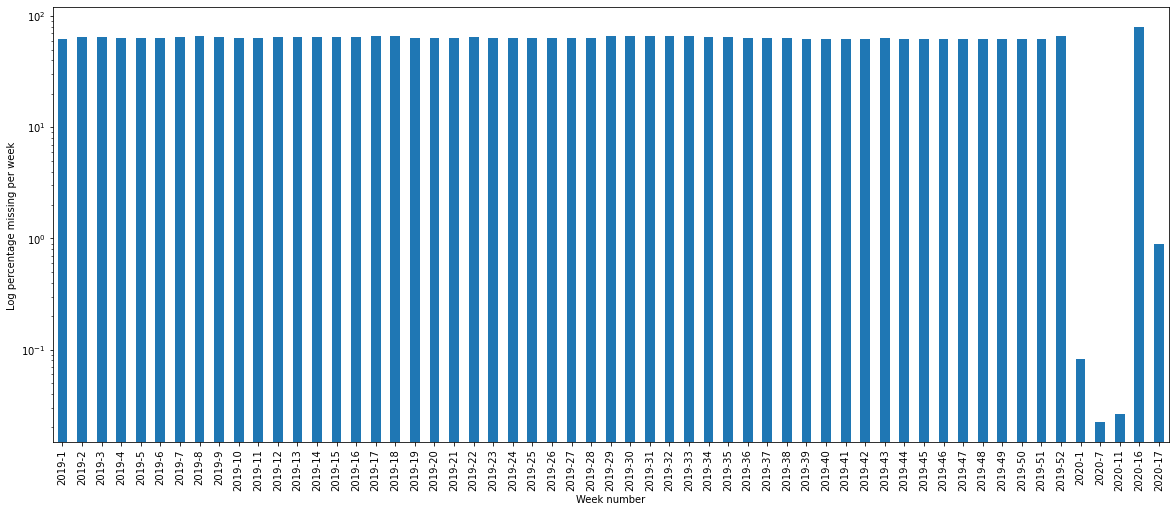

In [254]:

#visualize missing data per week 

fig, ax = plt.subplots(figsize=(20,8))

plt.xlabel("Week number")


ax.set_yscale('log')
ax.set_ylabel('Log percentage missing per week ')

ax.set_xlabel("Week number")


temp.set_index('Week number')["Percentage_missing"].plot.bar()




In [ ]:
#Uur to one file 
filelist=[]
for i in tqdm(months):
    dataframes=[]
    thisdir = os.getcwd() + "/Notebook" +"/" +str(i)
    for j in os.listdir(thisdir):
        if j.isnumeric():
            dir2 = os.listdir(thisdir+"/"+str(j))
            for k in dir2:
                if 'Reis_Bestemming_Uur' in k: 
                    file_dir = thisdir + "/" + j + "/" + k
                    df = pd.read_csv(str(file_dir),sep=None,engine='python')
                        #Clean stuff
                    if "AankomstHalteNaam" in df.columns:
                        df = df[df.AankomstHalteNaam != 'Overig']
                        df = df[df.AankomstHalteNaam != '[[ Onbekend ]]']
                    
                    df = df.dropna()

                    dataframes.append(df)
    
    merged = pd.concat(dataframes, ignore_index=True)
    filelist.append(merged)
    
    
final_merged_Uur = pd.concat(filelist, ignore_index=True)



In [ ]:
final_merged_Uur['Modaliteit'] = final_merged_Uur.AankomstHalteCode.str.isnumeric()
final_merged_Uur.Modaliteit = final_merged_Uur.Modaliteit.replace(to_replace=[True],value='Tram of bus')
final_merged_Uur.Modaliteit = final_merged_Uur.Modaliteit.replace(to_replace=[False],value='Metro')

final_merged_Uur.Datum =pd.to_datetime(final_merged_Uur.Datum)

final_merged_Uur = final_merged_Uur.sort_values(by=['Datum'])
final_merged_Uur = final_merged_Uur.drop("Unnamed: 0",axis=1)
final_merged_Uur = final_merged_Uur.dropna()
#final_merged_Uur.to_csv("Bestemming_Uur_merged.csv")

In [ ]:
final_merged_Uur

In [ ]:
final_merged_Uur.tail()

In [ ]:
droppedduplicates = final_merged_Uur.drop_duplicates(subset=['AankomstHalteNaam']).dropna(axis=1)

In [ ]:
droppedduplicates

In [ ]:
Final_merged_Uur_one_location = pd.merge(final_merged_Uur,droppedduplicates, on="AankomstHalteNaam",how='outer')

In [ ]:
Final_merged_Uur_one_location = Final_merged_Uur_one_location[["Datum_x","UurgroepOmschrijving (van aankomst)_x","AankomstHalteCode_x", "AankomstHalteNaam","AankomstLat_y","AankomstLon_y", "AantalReizen_x", "Modaliteit_x"]]
Final_merged_Uur_one_location.columns = droppedduplicates.columns

In [ ]:
Final_merged_Uur_one_location.Datum = Final_merged_Uur_one_location.Datum.sort_index()

In [ ]:
Final_merged_Uur_one_location.Modaliteit.value_counts()

In [ ]:
Final_merged_Uur_one_location[Final_merged_Uur_one_location.AankomstHalteNaam == "Amstelveenseweg"]

In [ ]:
Final_merged_Uur_one_location.to_csv("Bestemming_Uur_merged_one_location.csv")

In [ ]:
final_merged_Uur.to_csv("Bestemming_Uur_merged.csv")